## Observations and Insights

## Dependencies and starter code

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "../Downloads/05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results = "../Downloads/05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on='Mouse ID')
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# plt.hist(combined_results_df['Tumor Volume (mm3)'])
# plt.xlabel('Tumor Volume')
# plt.ylabel('Counts')
# plt.show()
mean = combined_results_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = combined_results_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = combined_results_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = combined_results_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combined_results_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mean
median
variance
standard_deviation
sem
#Summary Data Frame
summary_statistics_df = pd.DataFrame({"Mean": mean,
                                    "Median": median,
                                    "Variance": variance,
                                  "Standard Deviation": standard_deviation,
                                     "SEM":sem})
summary_statistics_df.head(30)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

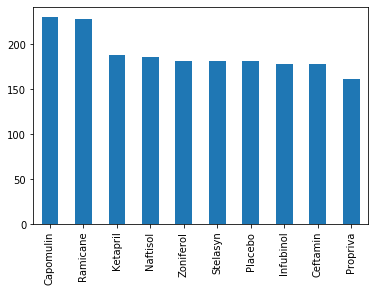

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = combined_results_df['Drug Regimen'].value_counts()
count.plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

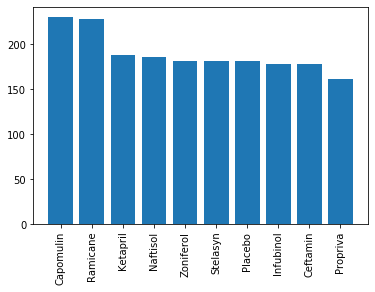

In [38]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(count.index.values,count.values)
plt.xticks(rotation=90)
plt.show

## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

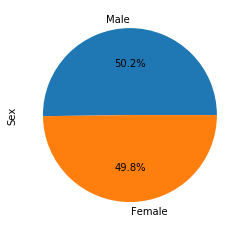

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = mouse_metadata_df.Sex.value_counts()
pie_plot.plot(kind='pie',autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

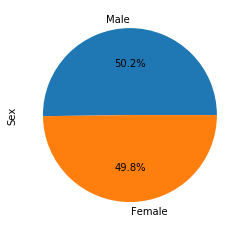

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = mouse_metadata_df.Sex.value_counts()
plt.pie(pie_plot.values,labels=pie_plot.index.values,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, outliers and boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_id_df = combined_results_df.groupby('Mouse ID').max()['Timepoint']
mouse_id_df
merged_data_df = pd.merge(combined_results_df, mouse_id_df, how='left', on='Mouse ID')
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_id_df = combined_results_df.groupby('Mouse ID').max()['Timepoint']
mouse_id_df
merged_data_df = pd.merge(combined_results_df, mouse_id_df, how='left', on='Mouse ID')
merged_data_df

#loc['Drug Regimen' where drug = each drug](top 3 and third from bottom) always based on the tumor volume 
drug_regimen_df = merged_data_df.loc[(merged_data_df["Capomulin"] >= 40) &
                                                 (merged_data_df["Ceftamin"] >=50) &
                                                 (merged_data_df["Infubinol"] >=50) &
                                                (merged_data_df["Ramicane"] >=40                    


drug_regimen_df= drug_regimen_df.set_index("Tumor Volume")

drug_regimen_df.head()

SyntaxError: invalid syntax (<ipython-input-58-cfa129624dcc>, line 15)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

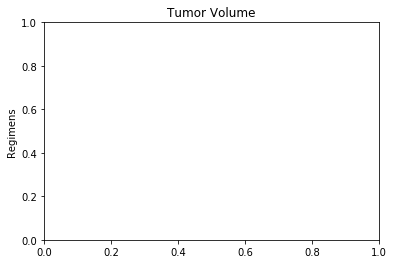

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#'Capomulin','Ceftamin','Infubinol','Ramicane']

regimens_df = pd.read_csv('../Downloads/05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv')
regimens = regimens_df['Drug Regimen']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Regimens')
ax1.boxplot(regimens)
plt.show()

## Line and scatter plots

TypeError: unhashable type: 'numpy.ndarray'

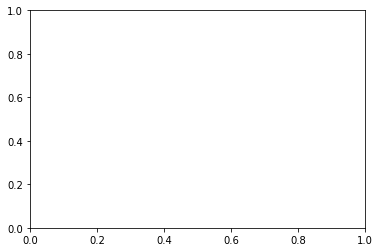

In [72]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint = plt.plot(combined_results_df, color='blue', label="Timepoint")
tumor_volume = plt.plot(combined_results_df, color='red', label="Tumor Volume")

# Create a legend for our chart
plt.legend(handles=[timepoint, tumor_volume], loc="best")

# Show the chart
plt.show()

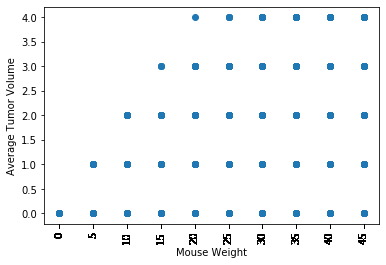

In [70]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = combined_results_df.iloc[:,5]
average_tumor_volume = combined_results_df.iloc[:,7]
plt.scatter(mouse_weight,average_tumor_volume)
plt.xticks(mouse_weight,rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()


In [73]:
# Calculate the correlation coefficient between malic_acid and flavanoids
print(f"The correlation coefficient between mouse weight and average tumor volume for Capoumlin is {round(st.pearsonr(mouse_weight,average_tumor_volume)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for Capoumlin is 0.65
